In [31]:
import pandas as pd #It helps to read and pre-process the dataset
import numpy as np # works with arrays
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #For visualization. Also works with satistical functions

from google.colab import drive

drive.mount('/content/gdrive')

train = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Sample_data/EDA/titanic_train.csv')
train.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Exploratory Data Analycis**
We will start by checking missing data.

**Missing Data:** We can use seaborn to create a heatmap to see where we have missing data!

In [32]:
#Normal way
train.isnull() #True means the value is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


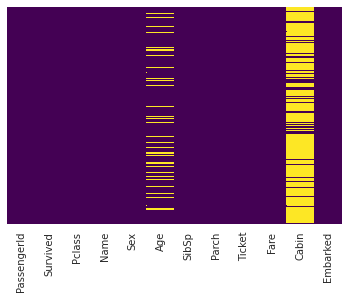

In [33]:
#Visualization: Seaborn with heatmap
sns.heatmap(train.isnull(), yticklabels=False ,cbar=False, cmap = 'viridis')

**Countplot For Survived persons**

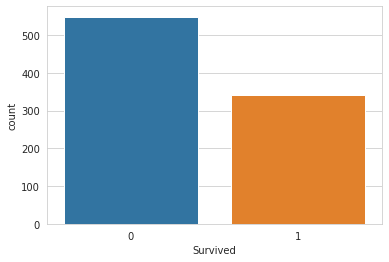

In [34]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

**Countplot for survived persons based on Sex**

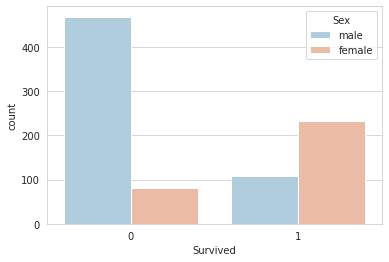

In [35]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Sex', data = train, palette='RdBu_r')

**Countplot for Survived persons based on Person Class**

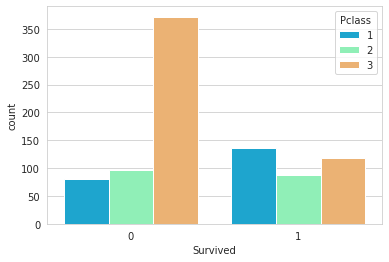

In [36]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Pclass', data = train, palette= 'rainbow')

**Seaborn Displot for Age data with drop the null values.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


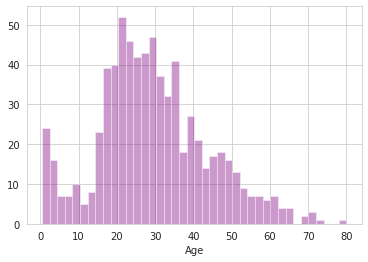

In [37]:
#Histogram with seaborn
sns.distplot(train['Age'].dropna(), kde = False, color = 'purple', bins= 40) #Displot will helps us to understand that which age's people are present in the titanic. 

**Matplotlib Displot for Age data**

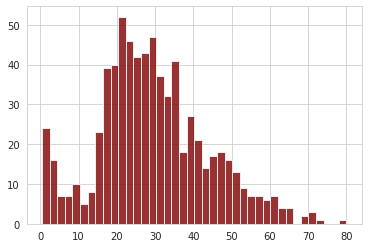

In [38]:
#Histogram with matplotlib
train['Age'].hist(bins = 40, color = 'maroon', alpha=0.8) #alpha works for color shade.

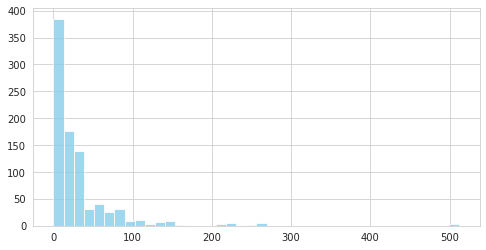

In [39]:
train['Fare'].hist(bins= 40, color = 'skyblue', alpha = 0.8, figsize = (8,4))

**Countplot to see the number of sibling and spouse of a person**

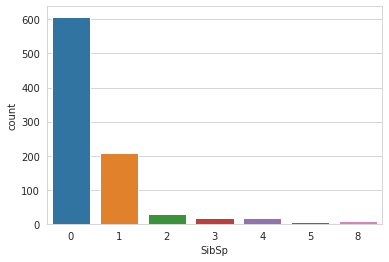

In [40]:
sns.countplot(x = 'SibSp', data = train)

### **Data Cleaning (Age Columns)**
We want to fill in missing age data instead of just dropping the missing data rows. One way to do this is by filing in the mean age of all the passengers (imputation). However we can be smarter about the check the average age by passenger class. For exampe

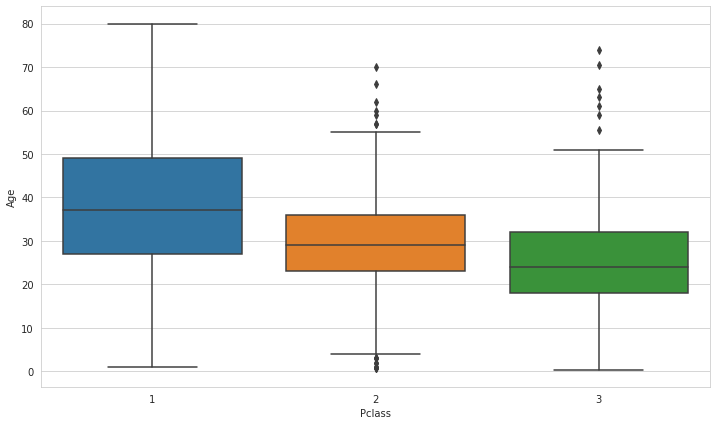

In [41]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

We can see the wealthier passenger in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [42]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

   if Pclass == 1:
    return 37
  
   elif Pclass == 2:
    return 29

   else:
    return 24
    
  else:
    return Age

**Now apply the function:**

In [43]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

**Now let's see the changes through heatmap**

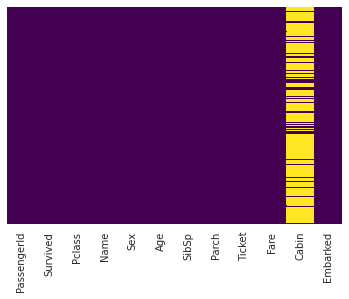

In [44]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

### **Data Cleaning (Cabin Columns)**
Cabin columns has many numbers of Null values. So we are directly dropping the column.

In [45]:
train.drop("Cabin", axis=1, inplace=True)
train.head()
# Delete the Area column from the dataframe in place
# Note that the original 'data' object is changed when inplace=True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Remove all null values**

In [46]:
train.dropna(inplace=True)

**Converting Categorical Features:**
We will need to convert categoric features to dummy variables using pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as input.

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


**Change Sex and Embarked columns with int and keep in a new variable**

In [48]:
sex = pd.get_dummies(train['Sex'],drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

**Drop the unecessary columns and Sex and Embarked columns**

In [49]:
train.drop(['Sex', 'Embarked', 'Ticket', 'Name'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


**Add the newly created columns, sex and embark**

In [50]:
train = pd.concat([train, sex, embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### **Building a Logistic Regression Model**
Let's start by spliting our data into a training set and test data

*** The “training” data set is the general term for the samples used to create the model, while the “test” or “validation” data set is used to qualify performance. Perhaps traditionally the dataset used to evaluate the final model performance is called the “test set”. *italicized text*

**Train Test Split**

In [51]:
#training dataset
train.drop('Survived', axis=1).head() #drop survived column as it is a dependent column. Others are training dataset.

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [52]:
#Output/test data
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), 
                                                    train['Survived'], 
                                                    test_size = 0.30, 
                                                    random_state =101)

**Training And Predicting**

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix

accuracy = confusion_matrix(y_test, predictions)
print(accuracy)

[[149  14]
 [ 39  65]]


In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8014981273408239


In [58]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])